<a href="https://colab.research.google.com/github/brianellis1997/Sarcasm_Detection/blob/Lindsey/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/brianellis1997/Sarcasm_Detection.git

Cloning into 'Sarcasm_Detection'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 170 (delta 93), reused 112 (delta 62), pack-reused 3
Receiving objects: 100% (170/170), 3.58 MiB | 11.19 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
train_bal = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/train_bal_2.csv')

In [4]:
train_bal

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,exclamation_count,questionmark_count,period_count,space_count,slash_count,elips_count,capital_letters_count,word_count,total_punctuation
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...,0,0,1,0,0,0,5,14,4
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....,0,0,0,0,0,0,0,3,0
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?,0,0,0,0,0,0,1,7,2
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(,0,0,1,0,0,0,1,5,1
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock.""",0,0,4,0,0,0,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808613,368312,1,"Yeah, all asians are smart, right?",est1roth,europe,2,2,0,2016-04-01,2016-04-17 00:05:51,"Well if an asian woman says it, it must be true.",0,1,0,0,0,0,1,6,3
808614,541588,1,Nah I was serious,SrrBrrGrr,funny,-5,-5,0,2015-08-01,2015-08-11 23:15:11,I don't think people understand you were jokin...,0,0,0,0,0,0,2,4,0
808615,833824,0,you are assuming way too much there is no liab...,cqm,blog,1,1,0,2014-09-01,2014-09-30 21:44:06,They're not saying it is easy. In fact they we...,0,0,0,0,0,0,0,41,6
808616,55102,1,But Planned Parenthood is the devil and must b...,DrScientist812,worldnews,3,3,0,2016-09-01,2016-09-06 12:40:25,Fall in ovarian cancer deaths worldwide linked...,1,0,0,0,0,0,3,13,1


In [5]:
import re, string, time, nltk
import numpy as np
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwordprovider
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             808618 non-null  int64 
 1   label                  808618 non-null  int64 
 2   comment                808618 non-null  object
 3   author                 808618 non-null  object
 4   subreddit              808618 non-null  object
 5   score                  808618 non-null  int64 
 6   ups                    808618 non-null  int64 
 7   downs                  808618 non-null  int64 
 8   date                   808618 non-null  object
 9   created_utc            808618 non-null  object
 10  parent_comment         808618 non-null  object
 11  exclamation_count      808618 non-null  int64 
 12  questionmark_count     808618 non-null  int64 
 13  period_count           808618 non-null  int64 
 14  space_count            808618 non-null  int64 
 15  

In [7]:
y = train_bal['label']
X = train_bal.drop(columns=['label'])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
y_train.shape[0]

646894

In [10]:
X_train.shape[0]

646894

In [11]:
X_text = X_train[['comment', 'parent_comment']]
X_numeric = X_train[['word_count', 'capital_letters_count', 'total_punctuation', 'score']] # add brians feature engineering

In [12]:
X_numeric.shape[0]

646894

In [13]:
X_text.shape[0]

646894

In [14]:
max_words = 10000  # Maximum number of words to keep based on word frequency
max_seq_length = 100  # Maximum length of sequences

In [15]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text['comment'] + ' ' + X_text['parent_comment'])

In [16]:
X_text_comment_seq = tokenizer.texts_to_sequences(X_text['comment'])
X_text_parent_comment_seq = tokenizer.texts_to_sequences(X_text['parent_comment'])

In [17]:
len(X_text_parent_comment_seq)

646894

In [18]:
len(X_text_comment_seq)

646894

In [19]:
y_train.shape[0]

646894

In [20]:
X_text_comment_pad = pad_sequences(X_text_comment_seq, maxlen=max_seq_length)
X_text_parent_comment_pad = pad_sequences(X_text_parent_comment_seq, maxlen=max_seq_length)

In [21]:
len(X_text_comment_pad)

646894

In [22]:
len(X_text_parent_comment_pad)

646894

In [23]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [24]:
X_numeric_scaled.shape[0]

646894

#Pretrained word2vec model

In [25]:
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
word2vec = gensim.models.Word2Vec.load('/content/drive/MyDrive/Sarcasm_Data/word2vec.model')

In [26]:
similar_words = word2vec.wv.most_similar('ok')
similar_words

[('okay', 0.9446449279785156),
 ('OK', 0.9253052473068237),
 ('alright', 0.7982171773910522),
 ('fine', 0.6672182083129883),
 ('perfectly_fine', 0.642020046710968),
 ('cool', 0.5878971815109253),
 ('justified', 0.5626591444015503),
 ('wrong', 0.5318138599395752),
 ('understandable', 0.5288909077644348),
 ('unacceptable', 0.4947114884853363)]

In [27]:
from gensim.models import Word2Vec

word_index = {word: idx for idx, word in enumerate(word2vec.wv.index_to_key, start=1)}


In [28]:
import numpy as np
from keras.layers import Embedding

# Assume word2vec is your pre-trained Word2Vec model
# Assume word_index is a dictionary mapping from word to integer index
# Assume max_words is the size of your vocabulary, and word2vec.vector_size is the size of each word vector

embedding_dim = word2vec.vector_size
max_words = len(word_index) + 1  # Adjust based on whether you start indexing from 0 or 1

# Initialize the embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))

# Populate the embedding matrix
for word, i in word_index.items():
    if i < max_words:
        if word in word2vec.wv:
            # Words not found in the embedding index will be all zeros
            embedding_matrix[i] = word2vec.wv[word]



In [29]:
embedding_dim

150

#CNN Model1

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 comment_input (InputLayer)  [(None, 100)]                0         []                            
                                                                                                  
 parent_comment_input (Inpu  [(None, 100)]                0         []                            
 tLayer)                                                                                          
                                                                                                  
 embedding (Embedding)       (None, 100, 100)             3139500   ['comment_input[0][0]',       
                                                                     'parent_comment_input[0][0]']
                                                                                              

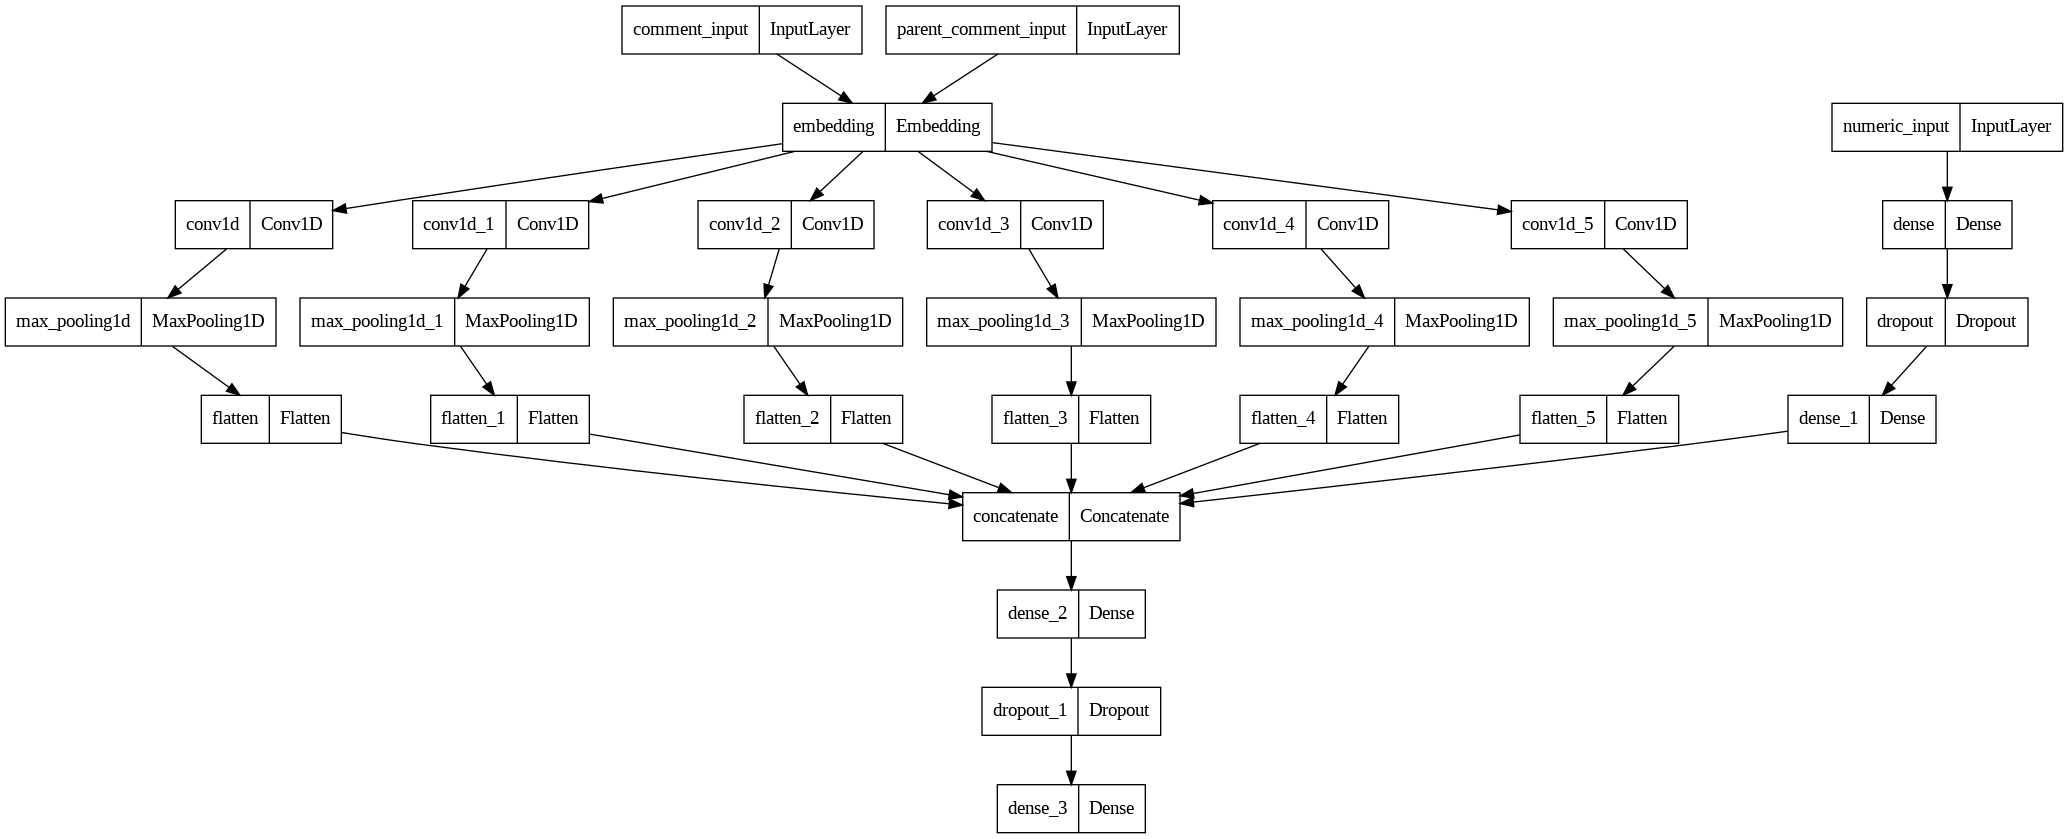

In [30]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from keras.models import Model



# tune pooling size
pool_size = 2

# smaller batch size for memory purposes
batch_size = 32

# Three model inputs so far
comment_input = Input(shape=(max_seq_length,), name='comment_input')
parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

embedding_dim = 100
num_filters = 128
filter_sizes = [3, 4, 5]

embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_seq_length)
comment_embedding = embedding_layer(comment_input)
parent_comment_embedding = embedding_layer(parent_comment_input)

conv_blocks = []
for filter_size in filter_sizes:
    conv_comment = Conv1D(filters=num_filters,
                          kernel_size=filter_size,
                          padding='valid',
                          activation='relu',
                          strides=1)(comment_embedding)
    conv_parent_comment = Conv1D(filters=num_filters,
                                 kernel_size=filter_size,
                                 padding='valid',
                                 activation='relu',
                                 strides=1)(parent_comment_embedding)

    max_pool_comment = MaxPooling1D(pool_size=max_seq_length - filter_size + 1)(conv_comment)
    max_pool_parent_comment = MaxPooling1D(pool_size=max_seq_length - filter_size + 1)(conv_parent_comment)

    conv_blocks.append(max_pool_comment)
    conv_blocks.append(max_pool_parent_comment)


# numeric_dense = Dense(64, activation='relu')(numeric_input)
# numeric_dense = Dense(32, activation='relu')(numeric_dense)


flatten_tensors = [Flatten()(tensor) for tensor in conv_blocks]


numeric_dense = Dense(64, activation='relu')(numeric_input)
numeric_dense = Dropout(0.5)(numeric_dense)
numeric_dense = Dense(32, activation='relu')(numeric_dense)



concatenated_final = concatenate(flatten_tensors + [numeric_dense], axis=-1)


dense = Dense(128, activation='relu')(concatenated_final)
dense = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dense)


model1 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()
plot_model(model1)






In [31]:
X_text_test = X_test[['comment', 'parent_comment']]
X_numeric_test = X_test[['word_count', 'capital_letters_count', 'total_punctuation', 'score']] # add brians feature engineering

In [32]:
X_text_comment_seq_test = tokenizer.texts_to_sequences(X_text_test['comment'])
X_text_parent_comment_seq_test = tokenizer.texts_to_sequences(X_text_test['parent_comment'])

In [33]:
X_text_comment_pad_test = pad_sequences(X_text_comment_seq_test, maxlen=max_seq_length)
X_text_parent_comment_pad_test = pad_sequences(X_text_parent_comment_seq_test, maxlen=max_seq_length)

In [34]:
scaler = StandardScaler()
X_numeric_scaled_test = scaler.fit_transform(X_numeric_test)

In [35]:
y_train.shape[0]

646894

In [36]:
len(X_text_comment_pad)

646894

In [ ]:
model1.fit({'comment_input': X_text_comment_pad, 'parent_comment_input': X_text_parent_comment_pad, 'numeric_input': X_numeric_scaled}, y_train, epochs=4, batch_size=batch_size, validation_split=0.1)




Epoch 1/4


In [ ]:
loss, accuracy = model1.evaluate({'comment_input': X_text_comment_pad_test,
                                 'parent_comment_input': X_text_parent_comment_pad_test,
                                 'numeric_input': X_numeric_scaled_test},
                                y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = model1.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                             'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)




#Build CNN with comment and parent comment


#CNN Model 2

In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from keras.models import Model



comment_input = Input(shape=(max_seq_length,), name='comment_input')
parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

embedding_layer = Embedding(input_dim=max_words,
                            output_dim=150,
                            weights=[embedding_matrix],
                            input_length=max_seq_length,
                            trainable=True)

comment_embedding = embedding_layer(comment_input)
parent_comment_embedding = embedding_layer(parent_comment_input)

concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

conv1 = Conv1D(filters=128,
               kernel_size=3,
               padding='valid',
               activation='relu',
               strides=1)(concatenated_embeddings)

max_pool1 = MaxPooling1D(pool_size=2)(conv1)

# Additional Convolutional Layer
conv2 = Conv1D(filters=64,  # You can adjust the number of filters
               kernel_size=3,  # Adjust the kernel size as needed
               padding='valid',  # 'valid' or 'same'
               activation='relu',
               strides=1)(max_pool1)


dropout1 = Dropout(0.5)(conv2)


flattened = Flatten()(dropout1)
max_dense1 = Dense(128, activation='relu')(flattened)

numeric_dense = Dense(64, activation='relu')(numeric_input)
numeric_dense = Dropout(0.5)(numeric_dense)
numeric_dense = Dense(32, activation='relu')(numeric_dense)


concatenated_final = concatenate([max_dense1, numeric_dense], axis=-1)

dense = Dense(128, activation='relu')(concatenated_final)
dropout_final = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout_final)

model3 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

In [ ]:
model3.fit({'comment_input': X_text_comment_pad, 'parent_comment_input': X_text_parent_comment_pad, 'numeric_input': X_numeric_scaled}, y_train, epochs=5, batch_size=batch_size, validation_split=0.1)




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = model3.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                             'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)


In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM, BatchNormalization
from keras.models import Model



comment_input = Input(shape=(max_seq_length,), name='comment_input')
parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

embedding_layer = Embedding(input_dim=max_words, output_dim=150, weights=[embedding_matrix], input_length=max_seq_length, trainable=True)

comment_embedding = embedding_layer(comment_input)
parent_comment_embedding = embedding_layer(parent_comment_input)

concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

conv1 = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(concatenated_embeddings)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)

conv2 = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = MaxPooling1D(pool_size=2)(conv2)


bi_lstm = Bidirectional(LSTM(64))(conv2)

flattened = Flatten()(bi_lstm)
flattened = Dropout(0.5)(flattened)


numeric_dense = Dense(64, activation='relu')(numeric_input)
numeric_dense = Dropout(0.5)(numeric_dense)
numeric_dense = Dense(32, activation='relu')(numeric_dense)


concatenated_final = concatenate([flattened, numeric_dense], axis=-1)

dense1 = Dense(128, activation='relu')(concatenated_final)
dense1 = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dense1)

model4 = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model4.fit({'comment_input': X_text_comment_pad, 'parent_comment_input': X_text_parent_comment_pad, 'numeric_input': X_numeric_scaled}, y_train, epochs=5, batch_size=batch_size, validation_split=0.1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Model

predictions = model4.predict({'comment_input': X_text_comment_pad_test,
                             'parent_comment_input': X_text_parent_comment_pad_test,
                             'numeric_input': X_numeric_scaled_test})

prediction_result = (predictions > 0.5).astype('int32')

accuracy = accuracy_score(y_test, prediction_result)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_test, prediction_result)
print('Precision: %f' % precision)


recall = recall_score(y_test, prediction_result)
print('Recall: %f' % recall)


f1 = f1_score(y_test, prediction_result)
print('F1 score: %f' % f1)


predictions = predictions.flatten()
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)

#Still at around 70% accuracy... look into cross validation or somethhing to find optimal model



In [ ]:
pip install keras-tuner


In [ ]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, Bidirectional, LSTM
from keras.models import Model
from keras import optimizers
from kerastuner import HyperModel

def build_model(hp):
    comment_input = Input(shape=(max_seq_length,), name='comment_input')
    parent_comment_input = Input(shape=(max_seq_length,), name='parent_comment_input')
    numeric_input = Input(shape=(X_numeric_scaled.shape[1],), name='numeric_input')

    embedding_layer = Embedding(input_dim=max_words,
                                output_dim=150,
                                weights=[embedding_matrix],
                                input_length=max_seq_length,
                                trainable=True)

    comment_embedding = embedding_layer(comment_input)
    parent_comment_embedding = embedding_layer(parent_comment_input)

    concatenated_embeddings = concatenate([comment_embedding, parent_comment_embedding], axis=1)

    conv1 = Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                   kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(concatenated_embeddings)
    conv1 = MaxPooling1D(pool_size=2)(conv1)

    conv2 = Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=64, step=32),
                   kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5]),
                   padding='same',
                   activation='relu')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)

    bi_lstm = Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32)))(conv2)

    flattened = Flatten()(bi_lstm)
    flattened = Dropout(0.5)(flattened)

    dense = Dense(hp.Int('dense_units', min_value=64, max_value=128, step=32), activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[comment_input, parent_comment_input, numeric_input], outputs=output)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning'
)

tuner.search_space_summary()

tuner.search(x=[X_text_comment_pad, X_text_parent_comment_pad, X_numeric_scaled],
             y=y_train,
             epochs=4,
             batch_size=128,
             validation_split=0.10)



best_model = tuner.get_best_models(num_models=1)[0]


In [ ]:
loss, accuracy = best_model.evaluate([X_text_comment_pad_test, X_text_parent_comment_pad_test, X_numeric_scaled_test], y_test)
print(f'Test Accuracy: {accuracy}')
